In [1]:
import numpy as np
import pandas as pd
import json
pd.set_option('display.max_colwidth', 200)

from io import BytesIO
import os
import pickle
import urllib

from PIL import Image
from glob import glob
import numpy as np
import os
import pickle
from PIL import Image
from tqdm import tqdm

In [2]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

data = getDF('meta_Home_and_Kitchen.json.gz')
df = data[['imUrl', 'asin', 'price','categories', 'brand']].dropna()

save_path = 'data/image'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
size = 32, 32

In [3]:
df.to_csv("basic_info.csv", index=None)

In [4]:
def url2npy(df):
    result = dict()
    for url, asin, price, categories, brand  in tqdm(zip(df.imUrl, df.asin, df.price, df.categories, df.brand)):
        if not 'no-img-sm.' in url:
            try:
                file = BytesIO(urllib.request.urlopen(url).read())
                img = Image.open(file).convert("RGB")
                complete_name = os.path.join(save_path, asin+'.jpg')
                img_resize = img.resize(size, resample = 3)
                img_array = np.asarray(img_resize)
                result[asin] = np.array([img_array, price, categories, brand])
            except:
                print("open err\n"+url)
                continue
        else:
            print("no-img\n"+url)
            continue
    return result

In [6]:
np.save('item.npy', url2npy(df))

161it [00:17, 11.07it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


7461it [08:04, 24.00it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


9162it [09:42, 20.18it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


12427it [12:51, 20.68it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


20056it [20:51,  6.17it/s]

open err
http://ecx.images-amazon.com/images/I/41f4P2AP7aL._SX300_.jpg


20709it [21:43, 17.92it/s]

open err
http://ecx.images-amazon.com/images/I/21h%2BjM--nnL._SX300_.jpg


21053it [22:05, 19.71it/s]

open err
http://ecx.images-amazon.com/images/I/41KjHMeJXfL._SY300_.jpg


21476it [22:32, 19.39it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


21503it [22:33, 25.37it/s]

open err
http://ecx.images-amazon.com/images/I/21D%2ByVvcGCL.jpg


29973it [31:36, 13.36it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


34494it [36:09, 19.02it/s]

open err
http://ecx.images-amazon.com/images/I/51UO3u4J9YL._SY300_.jpg


34523it [36:10, 17.65it/s]

open err
http://ecx.images-amazon.com/images/I/51s9qncEJRL._SY300_.jpg


34560it [36:14, 11.50it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


41858it [45:19, 20.08it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


47851it [51:24, 18.95it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


49024it [52:37,  7.54it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


49101it [52:45, 12.39it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


49644it [53:24, 17.51it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


50519it [54:09, 18.70it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


58011it [1:00:19, 23.55it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


60622it [1:02:45, 23.62it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


61094it [1:03:10, 22.08it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


61210it [1:03:17, 17.07it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


62395it [1:04:23, 19.68it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


64688it [1:06:29, 17.12it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


64872it [1:06:39, 15.60it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


67901it [1:09:26, 19.30it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


72300it [1:13:35, 14.17it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


78448it [1:20:13, 19.32it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


84004it [1:25:48, 18.38it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


84055it [1:25:51, 20.87it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


84485it [1:26:15, 20.75it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


86557it [1:28:06, 21.21it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


87692it [1:29:13, 16.47it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


88384it [1:29:52, 21.41it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


91157it [1:32:26, 17.63it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


92069it [1:33:18, 24.36it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


92813it [1:34:00, 18.23it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


92907it [1:34:06, 12.86it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


94700it [1:35:46, 19.95it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


95055it [1:36:07, 20.67it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


98514it [1:39:39,  2.10s/it]

open err
http://ecx.images-amazon.com/images/I/41QU-QGgBvL._SY300_.jpg


100010it [1:41:08, 18.13it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


100596it [1:41:43, 12.58it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


104624it [1:46:52, 15.77it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


104703it [1:46:56, 20.91it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


106085it [1:48:20, 20.51it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


106524it [1:48:57,  9.92it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


108250it [1:51:29, 18.23it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


109063it [1:52:15, 19.88it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


109961it [1:53:08, 23.45it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


110988it [1:54:07, 21.76it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


110995it [1:54:07, 16.38it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


111116it [1:54:14, 18.10it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


111502it [1:54:37, 17.21it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


111781it [1:54:51, 27.07it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


111990it [1:55:03, 18.35it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


112461it [1:55:31, 22.80it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


112689it [1:55:48, 16.06it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


113083it [1:56:13, 15.14it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


113437it [1:56:36, 18.35it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


114139it [1:57:20, 18.86it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


114649it [1:57:51, 19.22it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


115345it [1:58:33, 18.81it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


115352it [1:58:34, 20.72it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


116340it [1:59:40, 14.64it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


117265it [2:00:34, 21.48it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


118165it [2:01:29, 13.22it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


121195it [2:04:44, 18.61it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


121771it [2:05:19, 21.06it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


121876it [2:05:25, 17.42it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


121942it [2:05:28, 21.94it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


122141it [2:05:38, 21.81it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


124125it [2:07:34, 20.84it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


124811it [2:08:16, 15.28it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


130785it [2:14:05, 19.12it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


130908it [2:14:14, 22.77it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


131067it [2:14:24, 13.61it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


131838it [2:15:11, 13.35it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


131852it [2:15:12, 18.75it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


134597it [2:17:53, 20.48it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


134675it [2:17:58, 21.30it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


135950it [2:19:41, 17.88it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


135984it [2:19:44, 14.00it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


136204it [2:19:56, 14.01it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


138517it [2:22:27, 17.57it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


142059it [2:25:59, 19.22it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


143772it [2:27:48, 17.95it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


144397it [2:28:25, 16.61it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


145623it [2:29:37, 17.32it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


146568it [2:30:43, 17.58it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


146795it [2:30:55, 26.84it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


149167it [2:33:31, 13.55it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif
no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


151104it [2:35:24, 18.15it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


151543it [2:35:47, 17.73it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


152095it [2:36:24,  6.44it/s]

no-img
http://g-ecx.images-amazon.com/images/G/01/x-site/icons/no-img-sm._CB192198896_.gif


152111it [2:36:25, 11.35it/s]


In [7]:
data = np.load('item.npy').item()

In [8]:
list(data.keys())[0]

'B00133T6JE'

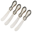

In [10]:
Image.fromarray(data['B00133T6JE'][0])